Data Visualization of the Dataset (50+ space missions)

In [3]:
# Imports
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('model data/model_data.csv')

Data Preprocessing and Splitting

In [4]:
# convert the data to DataFrame
df = pd.DataFrame(data, columns=["Mission Name", "Year", "Objective", "Outcome", "Reason", "Success"])

# remove rows with missing values
df.dropna(inplace=True)

# convert text data into numerical format
categorical_features = ["Mission Name", "Year", "Objective", "Outcome", "Reason"]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Return dense matrix
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ], remainder='passthrough')


# split dataset into training and test sets
X = df.drop("Success", axis=1)
y = df["Success"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# apply the transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# standardize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(35, 163) (35,)
(16, 163) (16,)


Data Visualization

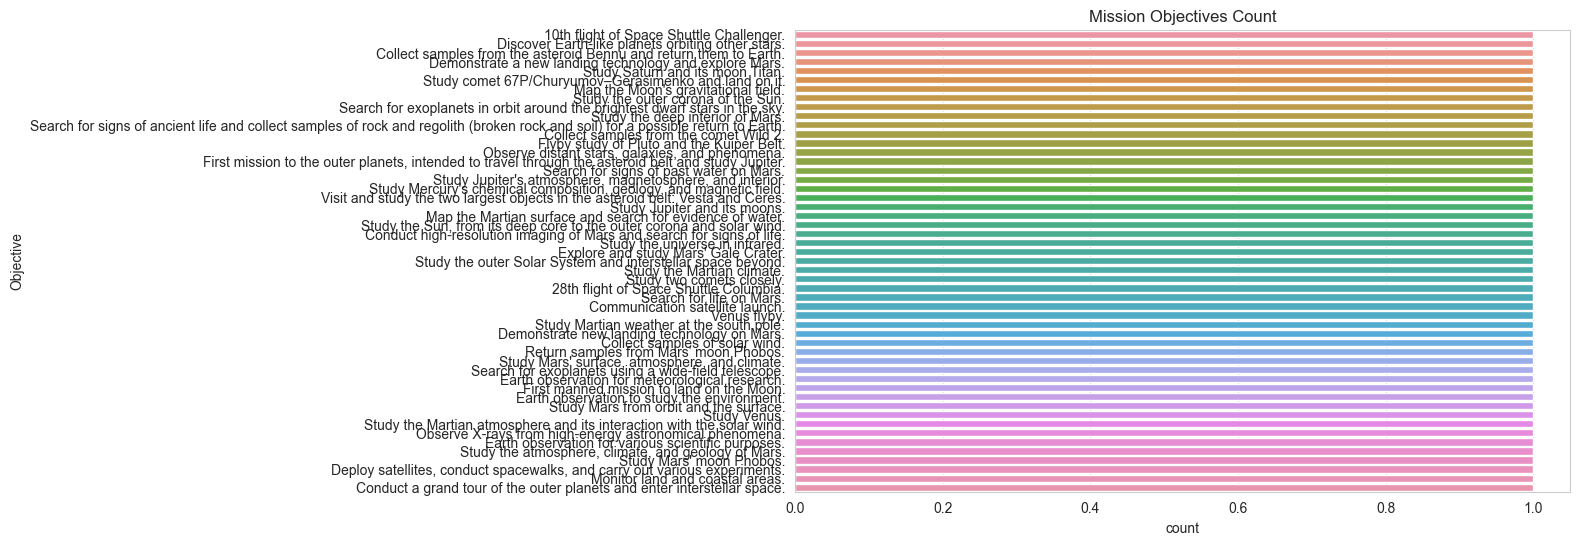

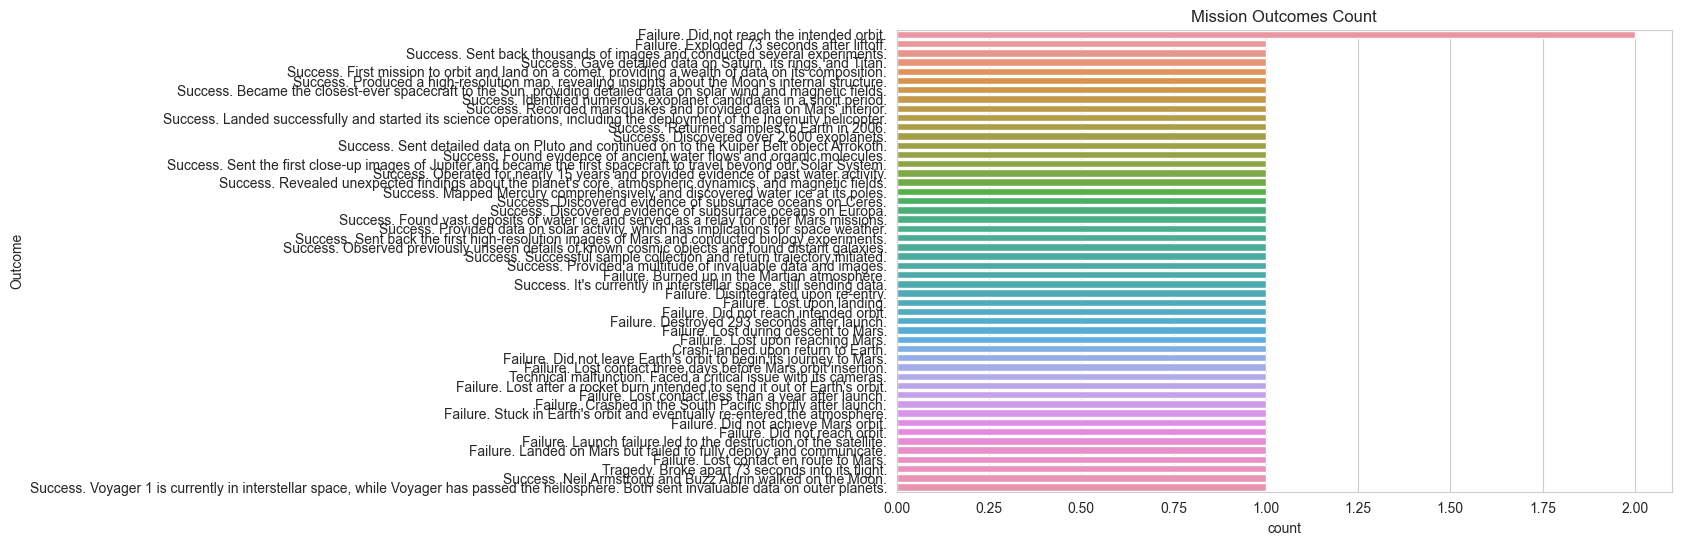

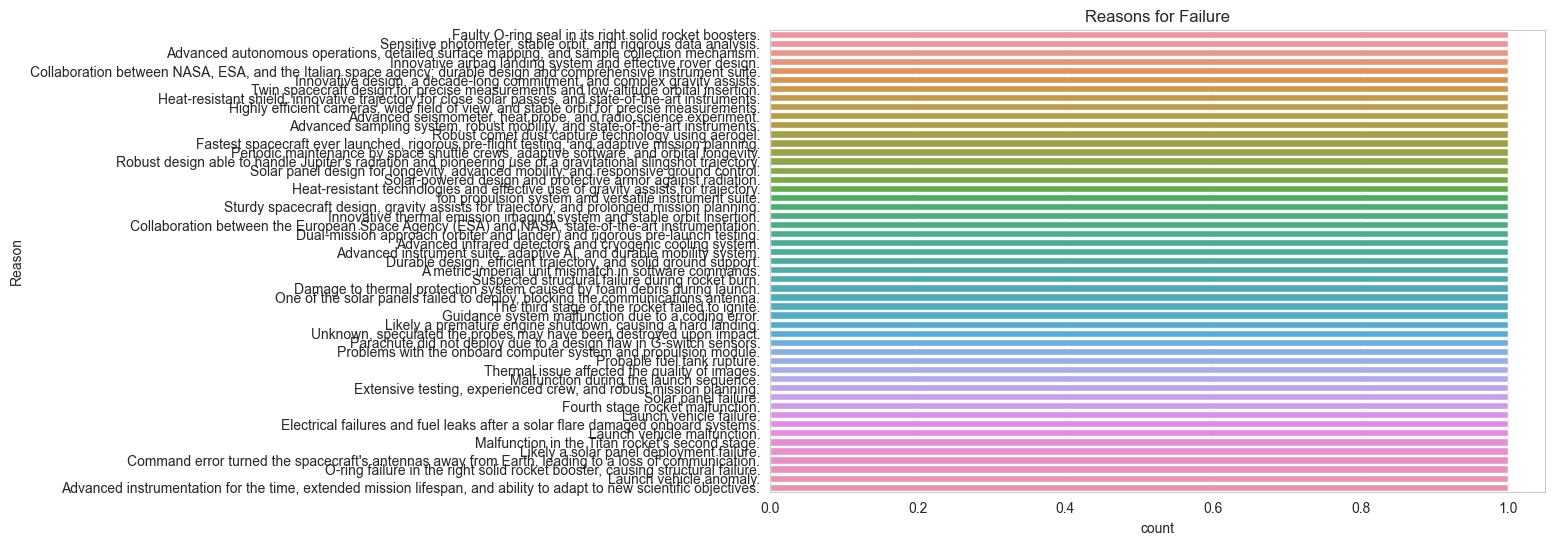

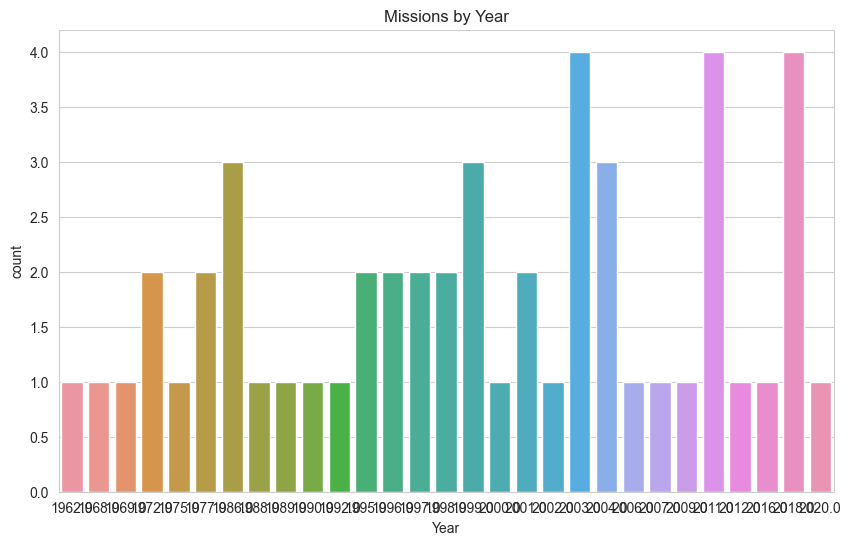

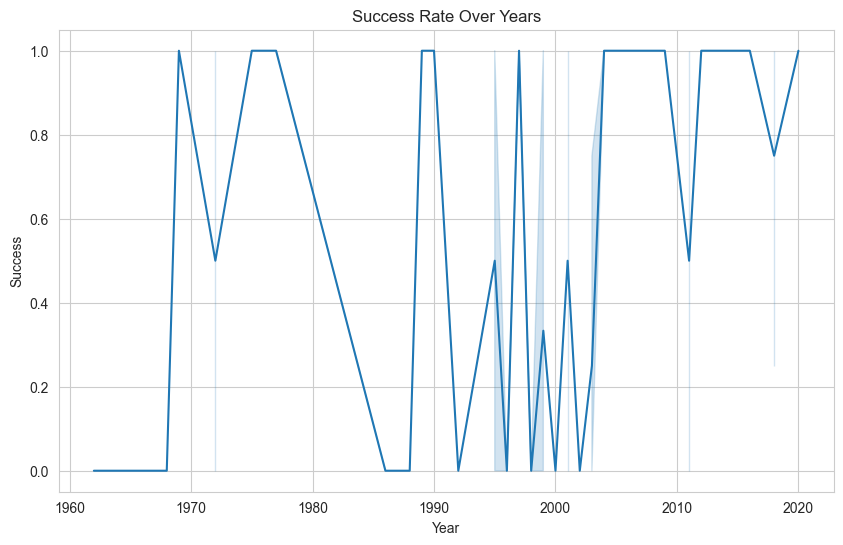

In [5]:
# setting Seaborn style
sns.set_style("whitegrid")

# count plot for 'Objective'
plt.figure(figsize=(10, 6))
sns.countplot(y='Objective', data=df, order=df['Objective'].value_counts().index)
plt.title('Mission Objectives Count')
plt.show()

# count plot for 'Outcome'
plt.figure(figsize=(10, 6))
sns.countplot(y='Outcome', data=df, order=df['Outcome'].value_counts().index)
plt.title('Mission Outcomes Count')
plt.show()

# count plot for 'Reason' (if failures are involved)
plt.figure(figsize=(10, 6))
sns.countplot(y='Reason', data=df, order=df['Reason'].value_counts().index)
plt.title('Reasons for Failure')
plt.show()

# distribution of missions across years
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Missions by Year')
plt.show()

# success rate across years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Success', data=df, estimator='mean')
plt.title('Success Rate Over Years')
plt.show()